# Plotando com BarPlot

In [ ]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

def create_bar_chart_by_dominant_label(file_path, label_colors=None):
    """
    Cria um gráfico de barras mostrando a frequência de cada label dominante em cada categoria,
    incluindo a contagem exata sobre cada barra.

    Parâmetros:
        file_path (str): Caminho para o arquivo Excel.
        label_colors (dict): Dicionário de cores para os labels (default: cores automáticas).
    """
    df = pd.read_excel(file_path)

    category_counts = {col: {"label_0": 0, "label_1": 0, "label_2": 0} for col in df.columns[1:]}

    def process_cell(cell):
        try:
            parsed_cell = ast.literal_eval(cell) if isinstance(cell, str) else cell
            if isinstance(parsed_cell, tuple) and isinstance(parsed_cell[0], dict):
                label_data = parsed_cell[0]
                max_label = max(label_data, key=label_data.get)  
                return max_label
        except (ValueError, SyntaxError):
            pass
        return None
   
    for col in df.columns[1:]:  
        for cell in df[col]:
            dominant_label = process_cell(cell)
            if dominant_label:
                category_counts[col][dominant_label] += 1

    plot_data = []
    for category, counts in category_counts.items():
        for label, count in counts.items():
            plot_data.append({"Categoria": category, "Label Dominante": label, "Frequência": count})

    plot_df = pd.DataFrame(plot_data)

    if not label_colors:
        label_colors = {
            "label_0": "#FFD700",  
            "label_1": "#8A2BE2",  
            "label_2": "#00CED1"   
        }

   
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=plot_df,
        x="Categoria",
        y="Frequência",
        hue="Label Dominante",
        palette=label_colors
    )

    
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

    plt.title("Frequência dos Labels Dominantes por Categoria", fontsize=14)
    plt.xlabel("Categoria", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Label Dominante", fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()


KeyboardInterrupt: 

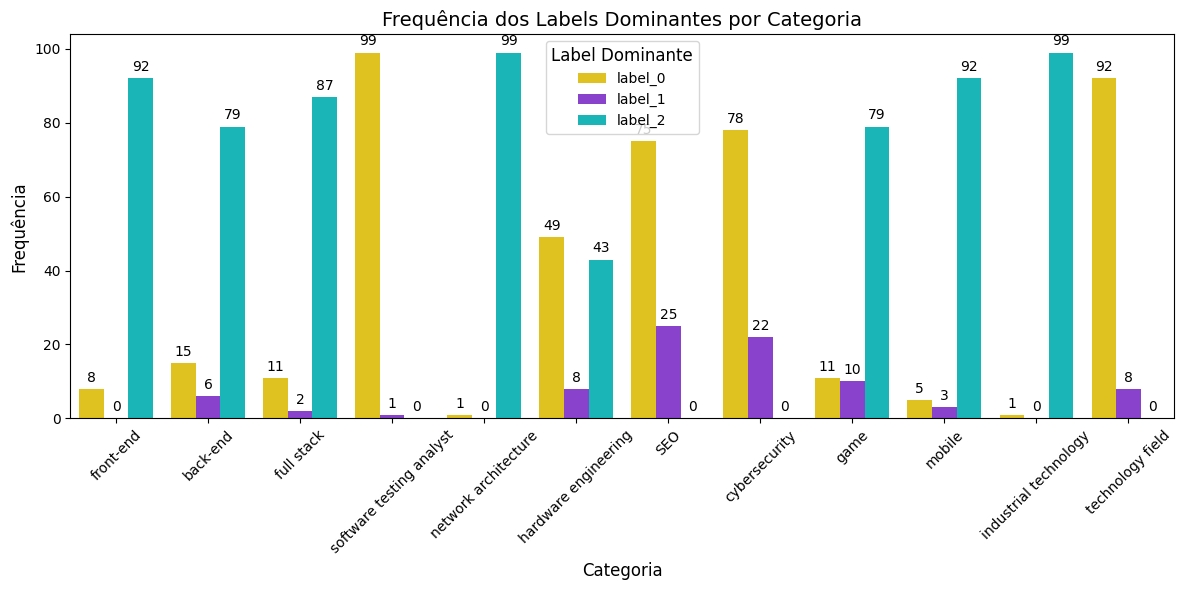

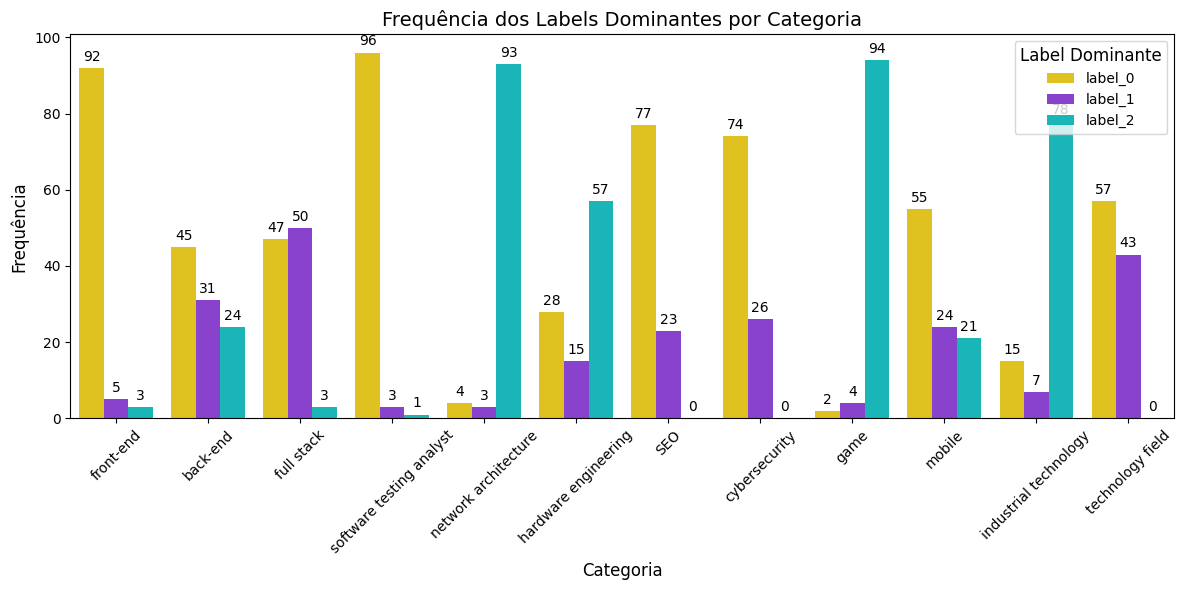

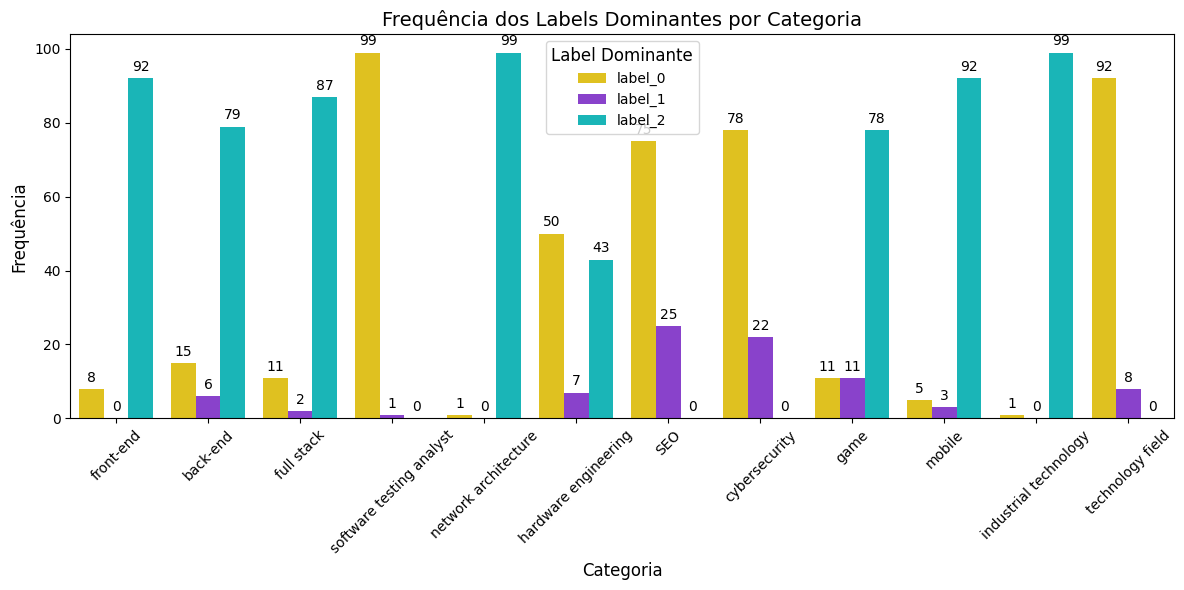

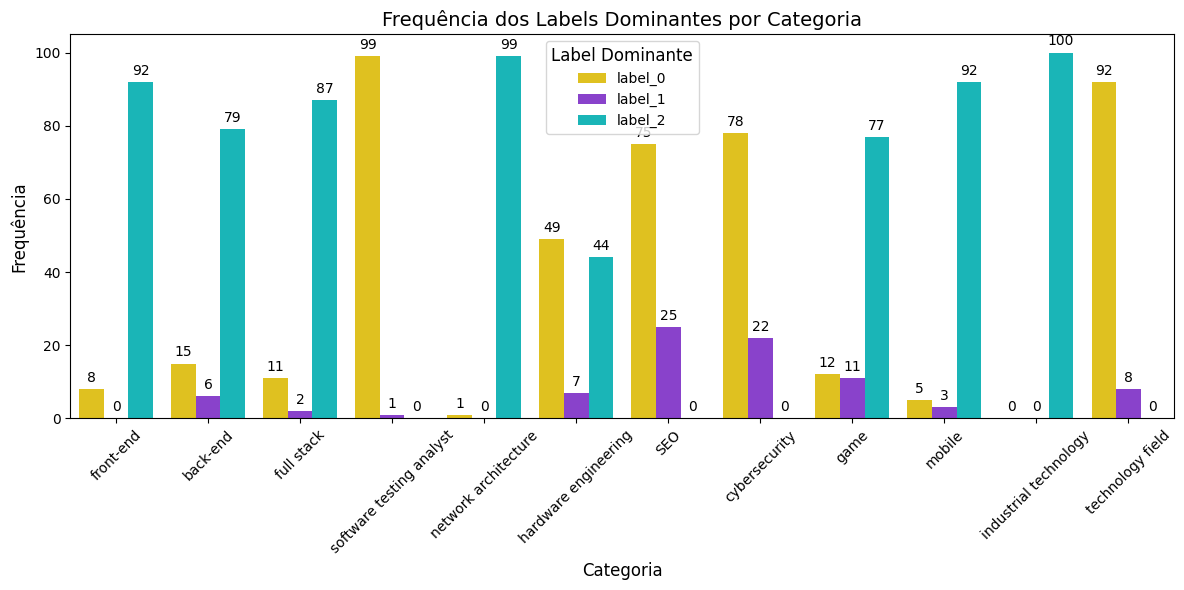

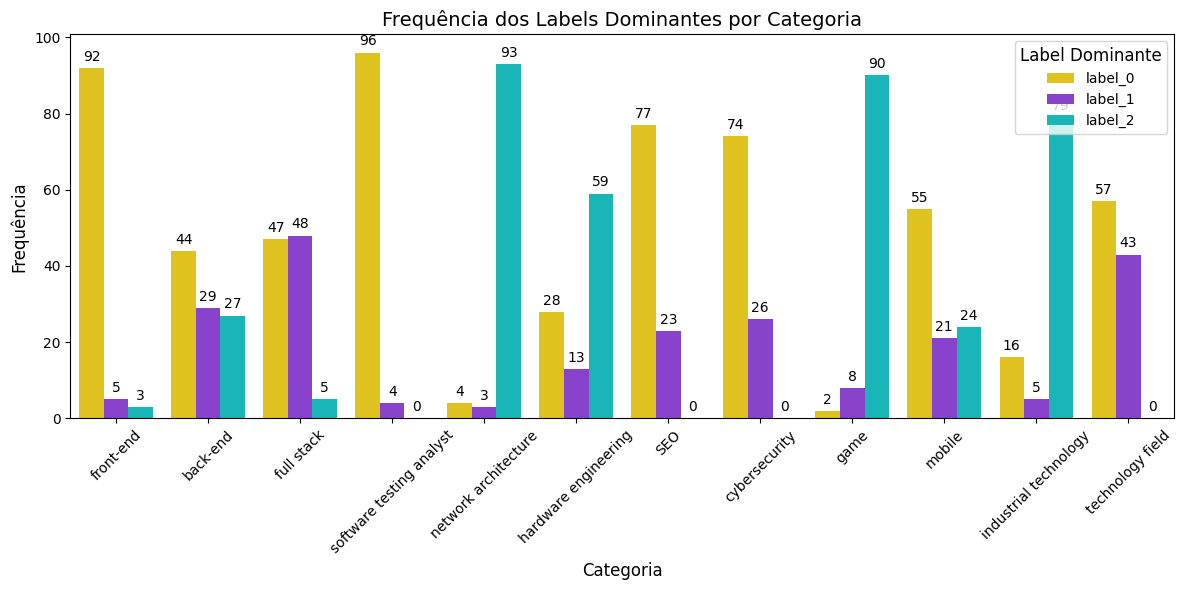

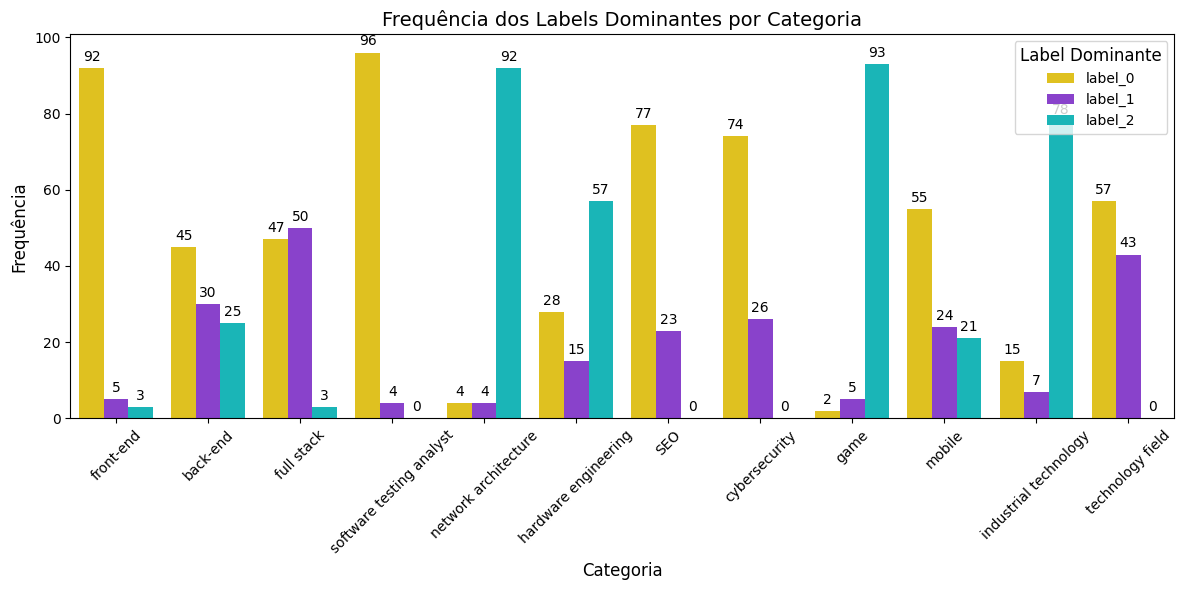

In [ ]:
create_bar_chart_by_dominant_label("results/BERT_gemini_prediction.xlsx")
create_bar_chart_by_dominant_label("results/BERT_gpt_prediction.xlsx")

# Heatmap de Contagem de Labels por Intervalo

In [8]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(file_path):
    data = pd.read_excel(file_path)
    df = pd.DataFrame(data)

    label_0_list, label_1_list, label_2_list = [], [], []

    def process_cell(cell):
        try:
            parsed_cell = ast.literal_eval(cell) if isinstance(cell, str) else cell
            if isinstance(parsed_cell, tuple) and isinstance(parsed_cell[0], dict):
                label_data = parsed_cell[0]
                return label_data.get('label_0', None), label_data.get('label_1', None), label_data.get('label_2', None)
        except (ValueError, SyntaxError):
            pass
        return None, None, None

    for col in df.columns[1:]:  
        for cell in df[col]:  
            label_0, label_1, label_2 = process_cell(cell)
            if label_0 is not None and label_1 is not None and label_2 is not None:
                label_0_list.append(label_0)
                label_1_list.append(label_1)
                label_2_list.append(label_2)

    labels_df = pd.DataFrame({'label_0': label_0_list, 'label_1': label_1_list, 'label_2': label_2_list})

    bins = [0, 25, 50, 75, 100]
    labels = ['0-25', '26-50', '51-75', '76-100']

    labels_df['faixa_0'] = pd.cut(labels_df['label_0'], bins=bins, labels=labels, include_lowest=True)
    labels_df['faixa_1'] = pd.cut(labels_df['label_1'], bins=bins, labels=labels, include_lowest=True)
    labels_df['faixa_2'] = pd.cut(labels_df['label_2'], bins=bins, labels=labels, include_lowest=True)

    heatmap_data = pd.DataFrame({
        'label_0': labels_df['faixa_0'].value_counts().sort_index(),
        'label_1': labels_df['faixa_1'].value_counts().sort_index(),
        'label_2': labels_df['faixa_2'].value_counts().sort_index()
    })

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data.T, cmap="Reds", annot=True, fmt="d", linewidths=0.5)

    plt.xlabel("Intervalos (%)")
    plt.ylabel("Labels")
    plt.title("Heatmap de Contagem de Labels por Intervalo")

    plt.show()


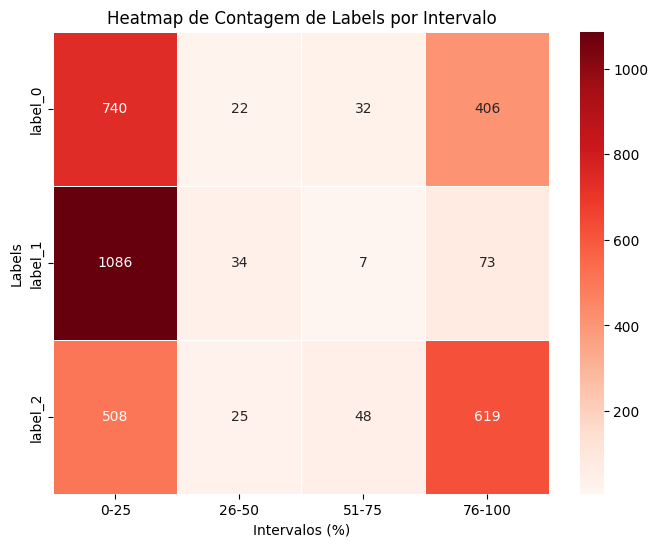

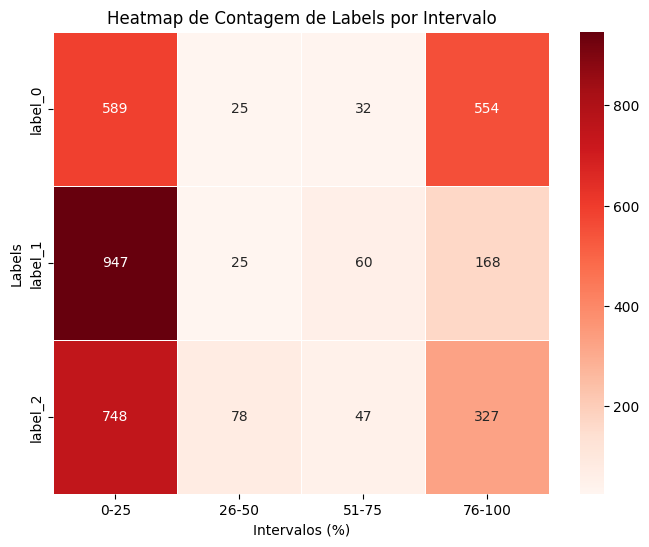

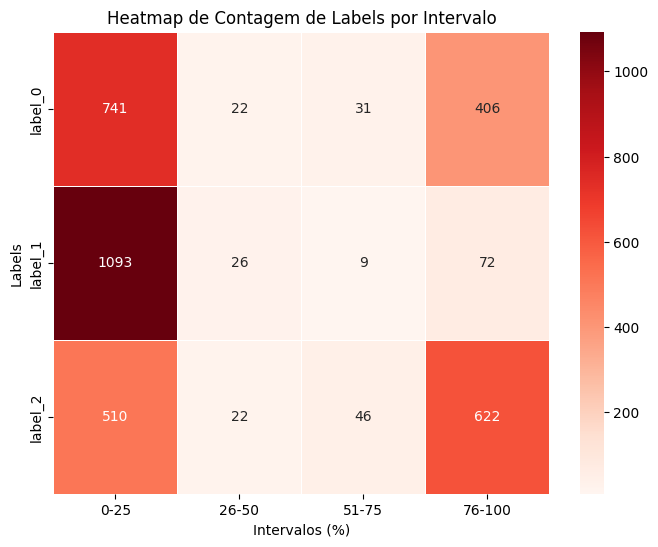

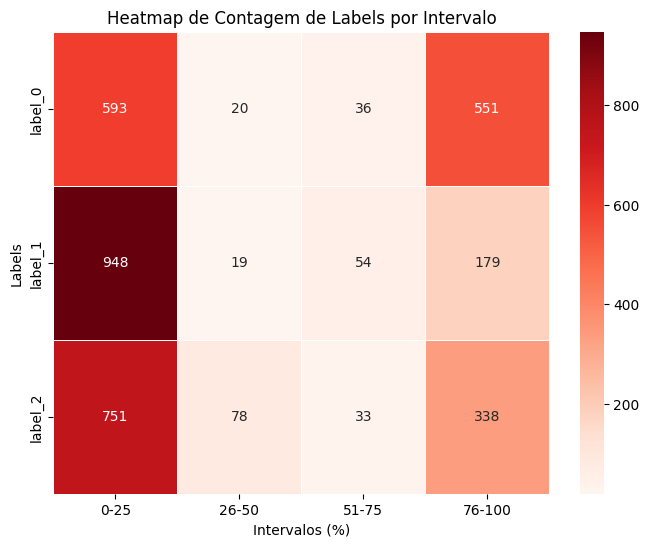

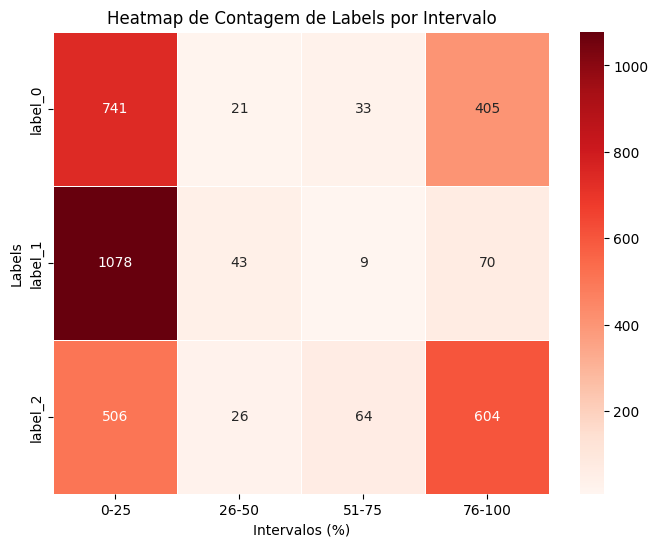

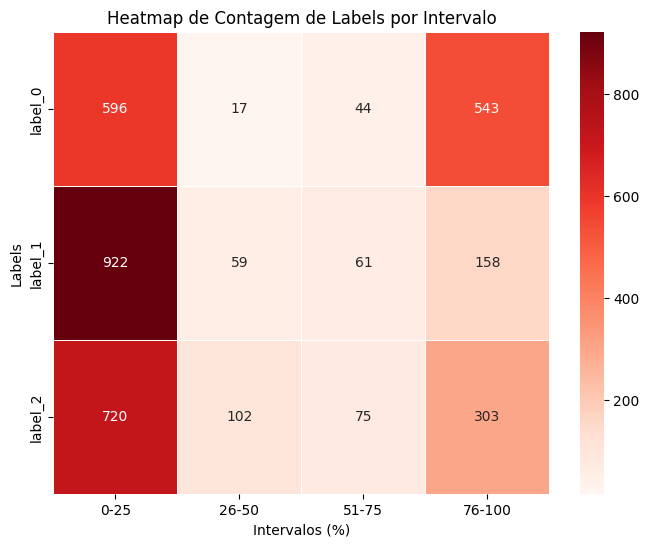

In [ ]:
create_heatmap("results/BERT_gemini_prediction.xlsx")
create_heatmap("results/BERT_gpt_prediction.xlsx")